###Importing packages and data

In [ ]:
%config InlineBackend.figure_formats = set(('retina', 'svg'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=0.8)

In [ ]:
atc_df = pd.read_csv('/content/drive/MyDrive/Machine learning/7v0015-cw-classification-adverts.csv')

###Sampling data

In [ ]:
atc_df.sample(3)

public_reference  mileage reg_code  ...        make_model age price_band
67219   202011015673924  79707.0       11  ...      MINI - Hatch  11     medium
92129   202010225296394  36000.0       15  ...  Nissan - Qashqai   7       high
88122   202008283059489  60000.0       61  ...  Vauxhall - Corsa  11     medium

[3 rows x 14 columns]

###Exploring features of dataset

In [ ]:
atc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96269 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96257 non-null  object 
 3   standard_colour        96269 non-null  object 
 4   standard_make          96269 non-null  object 
 5   standard_model         96269 non-null  object 
 6   vehicle_condition      96269 non-null  object 
 7   year_of_registration   96269 non-null  float64
 8   body_type              96269 non-null  object 
 9   crossover_car_and_van  96269 non-null  bool   
 10  fuel_type              96269 non-null  object 
 11  make_model             96269 non-null  object 
 12  age                    96269 non-null  int64  
 13  price_band             96269 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(9)
memory usa

In [ ]:
atc_df.describe()

public_reference        mileage  year_of_registration           age
count      9.626900e+04   96247.000000          96269.000000  96269.000000
mean       2.020082e+14   42964.067150           2015.096075      6.903925
std        1.194558e+10   34051.708175              3.766205      3.766205
min        2.014120e+14       0.000000           1962.000000      2.000000
25%        2.020091e+14   17000.000000           2013.000000      4.000000
50%        2.020100e+14   34352.000000           2016.000000      6.000000
75%        2.020102e+14   62000.000000           2018.000000      9.000000
max        2.020110e+14  999999.000000           2020.000000     60.000000

###Dealing with null values

In [ ]:
atc_df[atc_df.isnull().any(axis=1)]

public_reference   mileage  ... age price_band
4675    202001316783627       NaN  ...   2       high
10062   202009213998222       NaN  ...  12     medium
12694   202010195182638   38015.0  ...   7     medium
16085   202010255412754  143337.0  ...  20        low
16579   202008313138945       NaN  ...   9     medium
23110   202010295565469       NaN  ...   8       high
23777   202009264256298       NaN  ...   7       high
24939   202010104831802       NaN  ...   2  very high
32479   202001316783622       NaN  ...   2       high
34677   202010094786917       NaN  ...   2  very high
34887   202010134949022    9528.0  ...   5       high
36233   202009294352143  126500.0  ...  12     medium
39899   202006190303944       NaN  ...  17        low
40749   202008082242275       NaN  ...   3       high
46938   202010225291362  113000.0  ...  15     medium
47229   202009214019507       NaN  ...   4     medium
58620   202006180278623   91000.0  ...  10       high
60517   202010024528298       NaN  ...   4       high
62516   202007020758229       NaN  ...  10        low
67914   202010084768624   24180.0  ...   4       high
71084   202010265435971   35360.0  ...  23        low
72785   202010084771253       NaN  ...   2  very high
74072   202009023232962       NaN  ...   5  very high
74381   202001085917964       NaN  ...  10       high
76049   202010195179295       NaN  ...  14     medium
76695   202007291831064       NaN  ...   6       high
80919   202009083470986   71000.0  ...  14     medium
81308   202009013192347   28000.0  ...  60  very high
86351   202009254175936       NaN  ...  13     medium
89044   202008252909123       NaN  ...   9     medium
90893   202009033264762       NaN  ...   5     medium
94123   202009213992246   24500.0  ...   7     medium
94913   202008112372413       NaN  ...  16        low
95233   202007171374769   67080.0  ...   9       high

[34 rows x 14 columns]

In [ ]:
atc_df = atc_df.assign(mileage = atc_df['mileage'].fillna(atc_df['mileage'].median()))

###Feature Engineering

In [ ]:
atc_df = atc_df.assign(Model = atc_df['standard_model'].str.slice(0,1))

In [ ]:
atc_df.sample(3)

public_reference  mileage reg_code  ... age price_band Model
89072   202010124913425  49000.0       60  ...  12     medium     A
4347    202010215260417  72000.0       05  ...  17        low     C
46480   202010054618727  10585.0       67  ...   5       high     H

[3 rows x 15 columns]

In [ ]:
atc_df = atc_df.drop(columns=["make_model","standard_model"])

In [ ]:
atc_df.groupby(['Model', 'standard_make']).size()

Model  standard_make
1      BMW              6449
3      BMW              6727
5      BMW              3409
       Fiat             2754
A      Audi             8917
       Mercedes-Benz    5361
       Vauxhall         5653
C      Mercedes-Benz    6818
       Renault          2763
       Vauxhall         7876
E      Mercedes-Benz    3995
G      Volkswagen       8975
H      MINI             5363
J      Nissan           3959
P      Volkswagen       5778
Q      Nissan           5994
S      Kia              3519
Y      Toyota           1959
dtype: int64

In [ ]:
atc_df = atc_df[['standard_make', 'Model', 'body_type', 'mileage', 'age', 'price_band']]

In [ ]:
atc_df = atc_df.rename(columns={'standard_make' : 'CarCompany', 'Model' : 'CarModel', 'body_type' : 'BodyType', 'mileage' : 'Mileage', 'age' : 'CarAge', 'price_band': 'PriceBand' })
atc_df.sample(3)

CarCompany CarModel   BodyType  Mileage  CarAge  PriceBand
49424           Fiat        5  Hatchback  27000.0       8     medium
29592  Mercedes-Benz        C     Saloon   2721.0       3  very high
2492             BMW        3     Saloon  74466.0       7       high

In [ ]:
atc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CarCompany  96269 non-null  object 
 1   CarModel    96269 non-null  object 
 2   BodyType    96269 non-null  object 
 3   Mileage     96269 non-null  float64
 4   CarAge      96269 non-null  int64  
 5   PriceBand   96269 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ MB


In [ ]:
atc_df[atc_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [CarCompany, CarModel, BodyType, Mileage, CarAge, PriceBand]
Index: []

###Label Encoding for dependent variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
atc_df['PriceBand'] = le.fit_transform(atc_df['PriceBand'])

###One-Hot encoding for independent variables

In [ ]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the dataset
atc_df = dummies('CarCompany',atc_df)
atc_df = dummies('CarModel',atc_df)
atc_df = dummies('BodyType',atc_df)

In [ ]:
atc_df.sample()

Mileage  CarAge  PriceBand  BMW  Fiat  ...  Y  Estate  Hatchback  SUV  Saloon
67893   8440.0       7          0    0     0  ...  0       0          0    1       0

[1 rows x 29 columns]

In [ ]:
df = atc_df

In [ ]:
df

Mileage  CarAge  PriceBand  BMW  ...  Estate  Hatchback  SUV  Saloon
0       31534.0       5          0    0  ...       0          1    0       0
1       52023.0       6          0    0  ...       1          0    0       0
2       29500.0      10          2    0  ...       0          0    0       1
3       35300.0       4          2    0  ...       0          1    0       0
4       47299.0       6          0    0  ...       0          0    1       0
...         ...     ...        ...  ...  ...     ...        ...  ...     ...
96264   28225.0       5          0    0  ...       0          0    0       1
96265  122000.0      15          1    1  ...       0          0    0       1
96266   45000.0       7          2    0  ...       0          1    0       0
96267    4075.0       3          0    0  ...       0          0    1       0
96268   52760.0      10          2    0  ...       0          0    1       0

[96269 rows x 29 columns]

###Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
y = df.pop('PriceBand')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((77015, 28), (77015,), (19254, 28), (19254,))

In [ ]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

###Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy="uniform")
dc.fit(X_train, y_train)

DummyClassifier(strategy='uniform')

In [ ]:
y_pred_dc = dc.predict(X_test)

In [ ]:
dc_microA_train = accuracy_score(y_train, dc.predict(X_train))
dc_macroA_train = balanced_accuracy_score(y_train, dc.predict(X_train))
dc_microA_test = accuracy_score(y_test, y_pred_dc)
dc_macroA_test = balanced_accuracy_score(y_test, y_pred_dc)

In [ ]:
dc_score = pd.DataFrame(
    dict(
        microAccuracyTrain=dc_microA_train,
        macroAccuracyTrain=dc_macroA_train,
        microAccuracyTest=dc_microA_test,
        macroAccuracyTest=dc_macroA_test
    ), 
    index=['Dummy Classifier']
)
dc_score

microAccuracyTrain  ...  macroAccuracyTest
Dummy Classifier            0.249081  ...           0.258172

[1 rows x 4 columns]

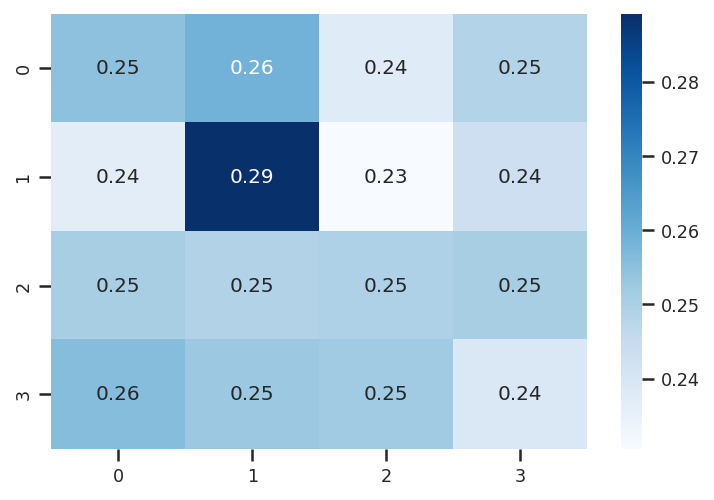

In [ ]:
cm = confusion_matrix(y_test, y_pred_dc, normalize='true')
heatmap = sns.heatmap(cm, annot=True, cmap="Blues")
#ConfusionMatrixDisplay(confusion_matrix=cm).plot();

###KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  y_pred_KNN = knn.predict(X_test)
  f1score = f1_score(y_test, y_pred_KNN, average = 'macro' )
  test_accuracy[i] = f1score

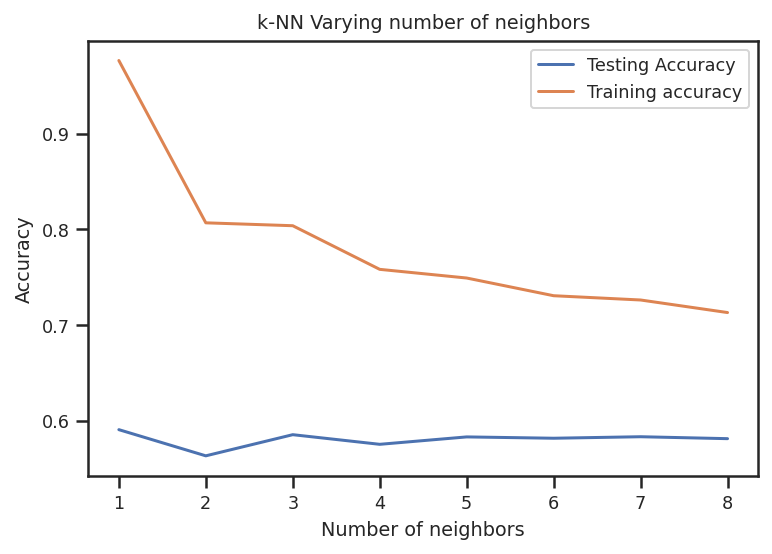

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=3. So lets create a KNeighborsClassifier with number of neighbors as 3

In [ ]:
knnc_3u = KNeighborsClassifier(3, weights='uniform')
knnc_3u = Pipeline([('scaler', StandardScaler()), ('model', knnc_3u)])
knnc_3u.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
y_pred_KNN_3u = knnc_3u.predict(X_test)

In [ ]:
knnc_3u_microA_train = accuracy_score(y_train, knnc_3u.predict(X_train))
knnc_3u_macroA_train = balanced_accuracy_score(y_train, knnc_3u.predict(X_train))
knnc_3u_microA_test = accuracy_score(y_test, y_pred_KNN_3u)
knnc_3u_macroA_test = balanced_accuracy_score(y_test, y_pred_KNN_3u)

In [ ]:
knnc_3d = KNeighborsClassifier(3, weights='distance')
knnc_3d = Pipeline([('scaler', StandardScaler()), ('model', knnc_3d)])
knnc_3d.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [ ]:
y_pred_KNN_3d = knnc_3d.predict(X_test)

In [ ]:
knnc_3d_microA_train = accuracy_score(y_train, knnc_3d.predict(X_train))
knnc_3d_macroA_train = balanced_accuracy_score(y_train, knnc_3d.predict(X_train))
knnc_3d_microA_test = accuracy_score(y_test, y_pred_KNN_3d)
knnc_3d_macroA_test = balanced_accuracy_score(y_test, y_pred_KNN_3d)

In [ ]:
knnc_score = pd.DataFrame(
    dict(
        microAccuracyTrain=[knnc_3u_microA_train, knnc_3d_microA_train],
        macroAccuracyTrain=[knnc_3u_macroA_train, knnc_3d_macroA_train],
        microAccuracyTest =[knnc_3u_microA_test, knnc_3d_microA_test],
        macroAccuracyTest =[knnc_3u_macroA_test, knnc_3d_macroA_test]),
        index=['KNN_3_uniform', 'KNN_3_distance'])
knnc_score.sort_values('macroAccuracyTest', ascending=False)

microAccuracyTrain  ...  macroAccuracyTest
KNN_3_uniform              0.90311  ...           0.802851
KNN_3_distance             0.97977  ...           0.791845

[2 rows x 4 columns]

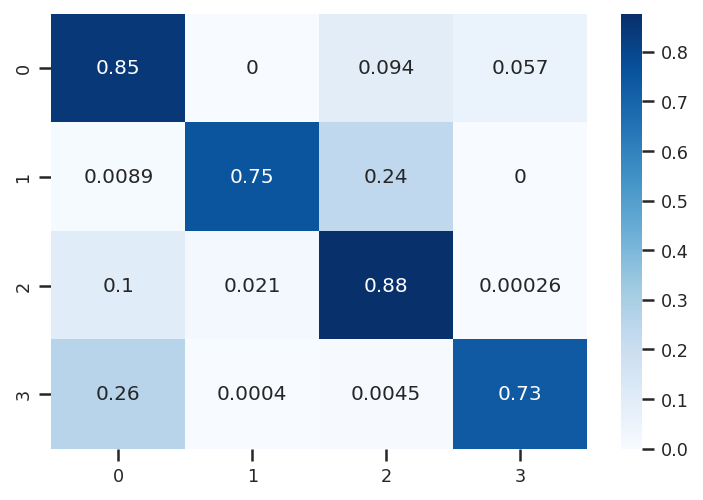

In [ ]:
cm = confusion_matrix(y_test, y_pred_KNN_3u, normalize='true')
heatmap = sns.heatmap(cm, annot=True, cmap="Blues")
#ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
KNN_Score = pd.DataFrame(
    dict(
        microAccuracyTrain=knnc_3u_microA_train,
        macroAccuracyTrain=knnc_3u_macroA_train,
        microAccuracyTest=knnc_3u_microA_test,
        macroAccuracyTest=knnc_3u_macroA_test), 
        index=['KNN Classifier'])

###Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_estimators=10)
rfc = Pipeline([('scaler', StandardScaler()), ('model', rfc)])
rfc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=10, random_state=42))])

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
rfc_microA_train = accuracy_score(y_train, rfc.predict(X_train))
rfc_macroA_train = balanced_accuracy_score(y_train, rfc.predict(X_train))
rfc_microA_test = accuracy_score(y_test, y_pred_rfc)
rfc_macroA_test = balanced_accuracy_score(y_test, y_pred_rfc)

In [ ]:
rfc_score = pd.DataFrame(
    dict(
        microAccuracyTrain=rfc_microA_train,
        macroAccuracyTrain=rfc_macroA_train,
        microAccuracyTest=rfc_microA_test,
        macroAccuracyTest=rfc_macroA_test
    ), 
    index=['Random Forest Classifier']
)
rfc_score

microAccuracyTrain  ...  macroAccuracyTest
Random Forest Classifier            0.964319  ...           0.788097

[1 rows x 4 columns]

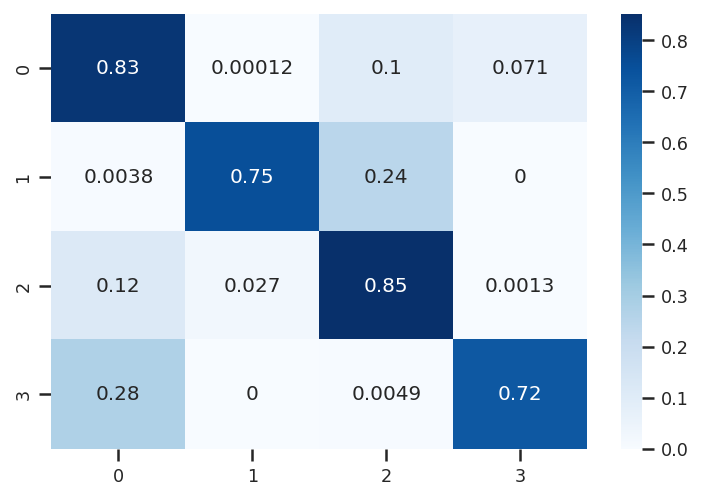

In [ ]:
cm = confusion_matrix(y_test, rfc.predict(X_test), normalize='true')
heatmap = sns.heatmap(cm, annot=True, cmap="Blues")
#ConfusionMatrixDisplay(confusion_matrix=cm).plot();

###Decission Tree Classifier

The higher value of maximum depth causes overfitting, and a lower value causes underfitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_depth = np.arange(1,15)
train_accuracy =np.empty(len(max_depth))
test_accuracy = np.empty(len(max_depth))

for i,d in enumerate(max_depth):
  dtc = DecisionTreeClassifier(max_depth=d)
  dtc.fit(X_train, y_train)
  train_accuracy[i] = dtc.score(X_train, y_train)
  y_pred_dtc = dtc.predict(X_test)
  f1score = f1_score(y_test, y_pred_dtc, average = 'macro' )
  test_accuracy[i] = f1score

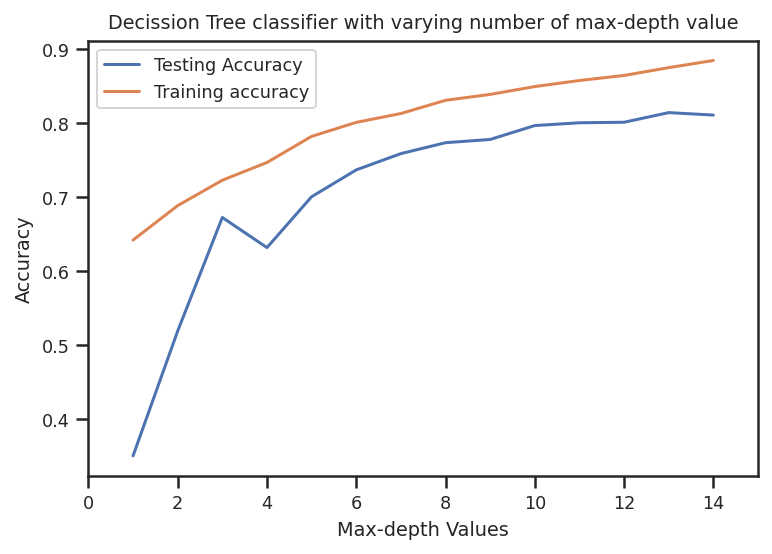

In [ ]:
plt.title('Decission Tree classifier with varying number of max-depth value')
plt.plot(max_depth, test_accuracy, label='Testing Accuracy')
plt.plot(max_depth, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Max-depth Values')
plt.xlim(0,15)
plt.ylabel('Accuracy')
plt.show()

In [ ]:
dtc_g = DecisionTreeClassifier(max_depth=8)
dtc_g.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
y_pred_dtc_g = dtc_g.predict(X_test)

In [ ]:
dtc_g_microA_train = accuracy_score(y_train, dtc_g.predict(X_train))
dtc_g_macroA_train = balanced_accuracy_score(y_train, dtc_g.predict(X_train))
dtc_g_microA_test = accuracy_score(y_test, y_pred_dtc_g)
dtc_g_macroA_test = balanced_accuracy_score(y_test, y_pred_dtc_g)

In [ ]:
dtc_e = DecisionTreeClassifier(criterion="entropy", max_depth=8)
dtc_e.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [ ]:
y_pred_dtc_e = dtc_e.predict(X_test)

In [ ]:
dtc_e_microA_train = accuracy_score(y_train, dtc_e.predict(X_train))
dtc_e_macroA_train = balanced_accuracy_score(y_train, dtc_e.predict(X_train))
dtc_e_microA_test = accuracy_score(y_test, y_pred_dtc_e)
dtc_e_macroA_test = balanced_accuracy_score(y_test, y_pred_dtc_e)

In [ ]:
dtc_score = pd.DataFrame(
    dict(
        microAccuracyTrain=[dtc_g_microA_train, dtc_e_microA_train],
        macroAccuracyTrain=[dtc_g_macroA_train, dtc_e_macroA_train],
        microAccuracyTest=[dtc_g_microA_test, dtc_e_microA_test],
        macroAccuracyTest=[dtc_g_macroA_test, dtc_e_macroA_test]), 
        index=['DecisionTree_giniCriterion', 'DecisionTree_entropyCriterion']
)
dtc_score.sort_values('macroAccuracyTest', ascending=False)

microAccuracyTrain  ...  macroAccuracyTest
DecisionTree_entropyCriterion            0.822203  ...           0.761637
DecisionTree_giniCriterion               0.830747  ...           0.752995

[2 rows x 4 columns]

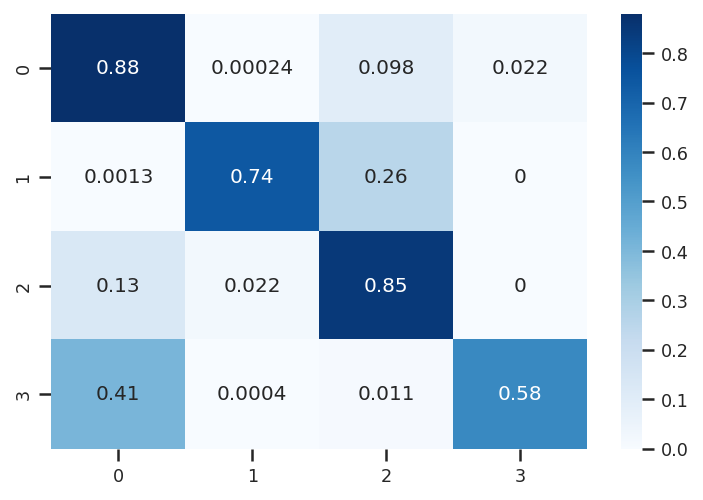

In [ ]:
cm = confusion_matrix(y_test, y_pred_dtc_e, normalize='true')
heatmap = sns.heatmap(cm, annot=True, cmap="Blues")
#ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
DecissionTree_Score = pd.DataFrame(
    dict(
        microAccuracyTrain=dtc_e_microA_train,
        macroAccuracyTrain=dtc_e_macroA_train,
        microAccuracyTest=dtc_e_microA_test,
        macroAccuracyTest=dtc_e_macroA_test), 
        index=['DecissionTree Classifier'])

###Support vector classifier

In [ ]:
from sklearn.svm import SVC
svc_L = SVC(kernel="linear", C = 1.0)
svc_L = Pipeline([('scaler', MinMaxScaler()), ('model', svc_L)])
svc_L.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(kernel='linear'))])

In [ ]:
y_pred_svc_L =  svc_L.predict(X_test)

In [ ]:
svc_L_microA_train = accuracy_score(y_train, svc_L.predict(X_train))
svc_L_macroA_train = balanced_accuracy_score(y_train, svc_L.predict(X_train))
svc_L_microA_test = accuracy_score(y_test, y_pred_svc_L)
svc_L_macroA_test = balanced_accuracy_score(y_test, y_pred_svc_L)

In [ ]:
svc_R = SVC(kernel="rbf", gamma=0.7, C = 1.0)
svc_R = Pipeline([('scaler', MinMaxScaler()), ('model', svc_R)])
svc_R.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', SVC(gamma=0.7))])

In [ ]:
y_pred_svc_R = svc_R.predict(X_test)

In [ ]:
svc_R_microA_train = accuracy_score(y_train, svc_R.predict(X_train))
svc_R_macroA_train = balanced_accuracy_score(y_train, svc_R.predict(X_train))
svc_R_microA_test = accuracy_score(y_test, y_pred_svc_R)
svc_R_macroA_test = balanced_accuracy_score(y_test, y_pred_svc_R)

In [ ]:
svc_P = SVC(kernel="poly", degree=3, gamma="auto", C = 1.0)
svc_P = Pipeline([('scaler', MinMaxScaler()), ('model', svc_P)])
svc_P.fit(X_train, y_train)

In [ ]:
y_pred_svc_P = svc_P.predict(X_test)

In [ ]:
svc_P_microA_train = accuracy_score(y_train, svc_P.predict(X_train))
svc_P_macroA_train = balanced_accuracy_score(y_train, svc_P.predict(X_train))
svc_P_microA_test = accuracy_score(y_test, y_pred_svc_P)
svc_P_macroA_test = balanced_accuracy_score(y_test, y_pred_svc_P)

In [ ]:
svmc_score = pd.DataFrame(
    dict(
        microAccuracyTrain=[svc_L_microA_train, svc_R_microA_train,svc_P_microA_train],
        macroAccuracyTrain=[svc_L_macroA_train, svc_R_macroA_train,svc_P_macroA_train ],
        microAccuracyTest=[svc_L_microA_test, svc_R_microA_test,svc_P_microA_test],
        macroAccuracyTest=[svc_L_macroA_test, svc_R_macroA_test,svc_P_macroA_test]), 
        index=['SVM_Linear_Kernal', 'SVM_RBF_Kernal','SVM_Poly_Kernal']
)
svmc_score.sort_values('macroAccuracyTest', ascending=False)

microAccuracyTrain  ...  macroAccuracyTest
SVM_Linear_Kernal            0.851652  ...           0.796177
SVM_RBF_Kernal               0.839512  ...           0.740340
SVM_Poly_Kernal              0.557813  ...           0.328377

[3 rows x 4 columns]

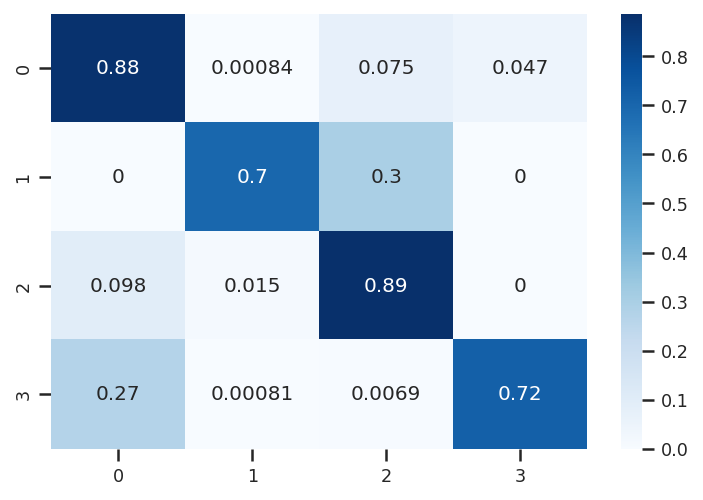

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc_L, normalize='true')
heatmap = sns.heatmap(cm, annot=True, cmap="Blues")

In [ ]:
SVM_Score = pd.DataFrame(
    dict(
        microAccuracyTrain=svc_L_microA_train,
        macroAccuracyTrain=svc_L_macroA_train,
        microAccuracyTest=svc_L_microA_test,
        macroAccuracyTest=svc_L_macroA_test), 
        index=['SVM Classifier'])

###Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lgrc = LogisticRegression(C=0.1, max_iter=1000)
lgrc = Pipeline(steps=[('standardscaler', StandardScaler()),
                       ('logisticregression', lgrc)])
lgrc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=1000))])

In [ ]:
y_pred_lgrc = lgrc.predict(X_test)

In [ ]:
lgrc_microA_train = accuracy_score(y_train, lgrc.predict(X_train))
lgrc_macroA_train = balanced_accuracy_score(y_train, lgrc.predict(X_train))
lgrc_microA_test = accuracy_score(y_test, y_pred_lgrc)
lgrc_macroA_test = balanced_accuracy_score(y_test, y_pred_lgrc)

In [ ]:
lgrc_score = pd.DataFrame(
    dict(
        microAccuracyTrain=lgrc_microA_train,
        macroAccuracyTrain=lgrc_macroA_train,
        microAccuracyTest=lgrc_microA_test,
        macroAccuracyTest=lgrc_macroA_test), index=['LGR'])
lgrc_score

microAccuracyTrain  ...  macroAccuracyTest
LGR            0.854275  ...           0.801056

[1 rows x 4 columns]

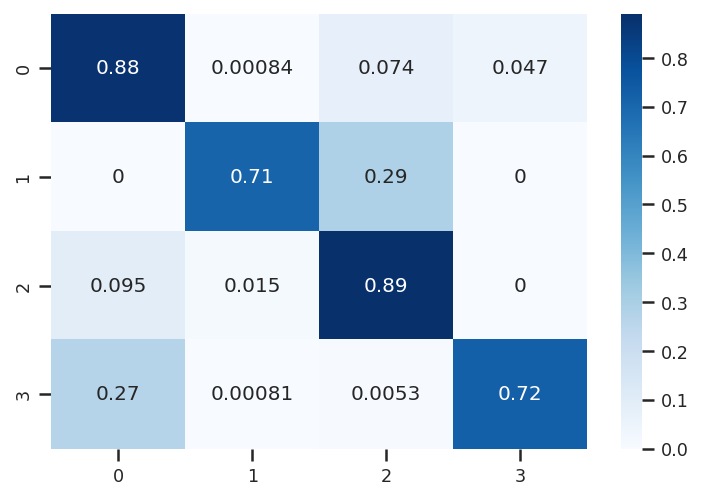

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgrc, normalize='true')
heatmap = sns.heatmap(cm, annot=True, cmap="Blues")

In [ ]:
ClassificationScores = pd.concat([dc_score, KNN_Score, rfc_score, DecissionTree_Score, SVM_Score, lgrc_score],axis='rows')
ClassificationScores.sort_values('macroAccuracyTest', ascending=False)

microAccuracyTrain  ...  macroAccuracyTest
KNN Classifier                      0.903110  ...           0.802851
LGR                                 0.854275  ...           0.801056
SVM Classifier                      0.851652  ...           0.796177
Random Forest Classifier            0.964319  ...           0.788097
DecissionTree Classifier            0.822203  ...           0.761637
Dummy Classifier                    0.249081  ...           0.258172

[6 rows x 4 columns]